
--- 
## L08 - Generalization error

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">

### Qa) On Generalization Error

A detailed description of figure 5.3 is written below, diveded into given concepts from the assignment.
 

__<u>Training/Generalization Error</u>__

In the figure, the __training error__ is displayed by the dotted blue line. It represents the error / loss observed during the models training phase, and is calculated based on the difference between the models predictions and the actual values in the dataset, showing how well the model understands this pattern.

__Generalization error__, shown by the green line on the graph, indicates the error / loss AFTER the trained model has been evaluated. This could be on data not used during the traning phase. It therefore measures how well the model can make predictions on new and unseen data.

__<u>Underfit / overfit zone</u>__

In the __underfit zone/regime__, it represents a situation where the model's capacity is too low, also seen to the left in the graph. In this zone, both the traning and generalization error are too high, and the model fails to learn on both trained and unseen data.

The __Overfit zone/regime__ represents sutations where the capacity is too high, which might lead it to fitting ie. on the noise in the training data(meaning the model understands the patterns in the training data very well). The training error is thereby low, but the generation error is too high. 

__<u>Generalization gab</u>__

The __generalization gab__ represents the difference between the training and generalization error. This is seen to the right in the graph when the capacity is being increased, where the gap size outweights the decrease in training error (leads to overfitting!)

__<u>Optimal capactity</u>__

The __optimal capacity__ represents a 'sweet spot', where the model greatly balances between being underfitted and overfitted. This is because of the model being able to find the patterns in the data without overfitting, meaning a good capacity value has been chosen to fit both unseen and trained data.

__<u>The axes</u>__

The y-axis represents the error / loss by the model, where the x-axis represents the model's capacity / complexity. Increasing a models capacity gives the model a better understand of the underlying patterns in the data, which is seen on the graph by the decrease in error. Increasing it too much, it starts overfitting, as previously explains.


### Qb) A MSE-Epoch/Error Plot

Now we will look into the SGD model for fitting polynomial (__polynomial regression__), described simialary in [HOML] ("Polynomial Regression" + "Learning Curves").  

The code will be reviewed, each part by itself, and important points will be descriped. 

__<u>Part I</u>__

Once again, data is being generated by the `GenerateData` function, also adding some noise to the dataset. We split the data into training and validation sets by using the `test_train_split` function. By using a 90 degree polynomial for the polynomial regression, we produce a model with a very high capacity. The `PolynomialFeatures` are added into a pipeline, afterwareds scaled by a `StandardScaler` to ensure that each feature has a mean of 0 and standard deviation of 1 (as done in previous assignments). Lastly both the training and validation sets are being transformed by the pipeline we just created.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


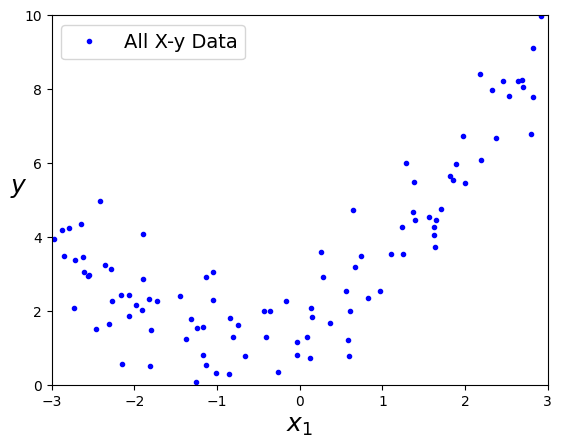

OK


In [23]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

__<u>Part II</u>__

The `Train` function trains our SGD regressor for a specified number of epochs, defined by `n_epochs` in the codeblock.

An __epoch__ is a one complete pass through our training data set in the training phase, basically one iteration where it updates the model's parameters by using SGD.

We use this function to train our model, and returning its result in the `tran_errors` and `val_errors` arrays. For each epoch, here set to 500, the model is being trained with a max iteration of 1, meaning  the algorithm will only update the model's parameters once (with a random selected sample from the training set), rather than processing the entire dataset.

Lasty by setting `verbose` to true, we print out the `epoch`, `mse_train` and `mse_val`. The last two are metrics that we use to evaluate how the model performs (seperately) on both the training and validation sets. With a lower MSE value, it indicated a better performance. The `mse_train` tells us how well the model fits to the training data, and the `mse_val` tells us how well it generalizes on unseen data.

In [24]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant", 
                           tol=-float(0), 
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91


  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  22, mse_train=6.49, mse_val=7.98
  epoch=  23, mse_train=6.34, mse_val=7.81
  epoch=  24, mse_train=6.19, mse_val=7.65
  epoch=  25, mse_train=6.05, mse_val=7.49
  epoch=  26, mse_train=5.91, mse_val=7.34
  epoch=  27, mse_train=5.77, mse_val=7.20
  epoch=  28, mse_train=5.64, mse_val=7.06
  epoch=  29, mse_train=5.52, mse_val=6.92
  epoch=  30, mse_train=5.40, mse_val=6.79
  epoch=  31, mse_train=5.28, mse_val=6.66
  epoch=  32, mse_train=5.16, mse_val=6.54
  epoch=  33, mse_train=5.05, mse_val=6.42
  epoch=  34, mse_train=4.94, mse_val=6.30
  epoch=  35, mse_train=4.84, mse_val=6.18
  epoch=  36, mse_train=4.73, mse_val=6.07
  epoch=  37, mse_train=4.63, mse_val=5.97
  epoch=  38, mse_train=4.54, mse_val=5.86
  epoch=  39, mse_train=4.44, mse_val=5.76
  epoch=  40, mse_train=4.35, mse_val=5.66
  epoch=  4

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch=  56, mse_train=3.17, mse_val=4.36
  epoch=  57, mse_train=3.11, mse_val=4.29
  epoch=  58, mse_train=3.06, mse_val=4.23
  epoch=  59, mse_train=3.00, mse_val=4.16
  epoch=  60, mse_train=2.95, mse_val=4.10
  epoch=  61, mse_train=2.89, mse_val=4.04
  epoch=  62, mse_train=2.84, mse_val=3.98
  epoch=  63, mse_train=2.79, mse_val=3.93
  epoch=  64, mse_train=2.74, mse_val=3.87
  epoch=  65, mse_train=2.70, mse_val=3.81
  epoch=  66, mse_train=2.65, mse_val=3.76
  epoch=  67, mse_train=2.60, mse_val=3.71
  epoch=  68, mse_train=2.56, mse_val=3.66
  epoch=  69, mse_train=2.52, mse_val=3.60
  epoch=  70, mse_train=2.47, mse_val=3.56
  epoch=  71, mse_train=2.43, mse_val=3.51
  epoch=  72, mse_train=2.39, mse_val=3.46
  epoch=  73, mse_train=2.35, mse_val=3.41


C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch=  74, mse_train=2.31, mse_val=3.37
  epoch=  75, mse_train=2.28, mse_val=3.32
  epoch=  76, mse_train=2.24, mse_val=3.28
  epoch=  77, mse_train=2.20, mse_val=3.24
  epoch=  78, mse_train=2.17, mse_val=3.20
  epoch=  79, mse_train=2.14, mse_val=3.15
  epoch=  80, mse_train=2.10, mse_val=3.12
  epoch=  81, mse_train=2.07, mse_val=3.08
  epoch=  82, mse_train=2.04, mse_val=3.04
  epoch=  83, mse_train=2.01, mse_val=3.00
  epoch=  84, mse_train=1.98, mse_val=2.96
  epoch=  85, mse_train=1.95, mse_val=2.93
  epoch=  86, mse_train=1.92, mse_val=2.89
  epoch=  87, mse_train=1.89, mse_val=2.86
  epoch=  88, mse_train=1.86, mse_val=2.82
  epoch=  89, mse_train=1.84, mse_val=2.79
  epoch=  90, mse_train=1.81, mse_val=2.76
  epoch=  91, mse_train=1.79, mse_val=2.73
  epoch=  92, mse_train=1.76, mse_val=2.70
  epoch=  93, mse_train=1.74, mse_val=2.67
  epoch=  94, mse_train=1.71, mse_val=2.64
  epoch=  95, mse_train=1.69, mse_val=2.61
  epoch=  96, mse_train=1.67, mse_val=2.58
  epoch=  9

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch= 126, mse_train=1.18, mse_val=1.95
  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 148, mse_train=0.99, mse_val=1.68
  epoch= 14

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch= 175, mse_train=0.84, mse_val=1.49
  epoch= 176, mse_train=0.84, mse_val=1.49
  epoch= 177, mse_train=0.83, mse_val=1.48
  epoch= 178, mse_train=0.83, mse_val=1.48
  epoch= 179, mse_train=0.82, mse_val=1.47
  epoch= 180, mse_train=0.82, mse_val=1.47
  epoch= 181, mse_train=0.82, mse_val=1.46
  epoch= 182, mse_train=0.81, mse_val=1.46
  epoch= 183, mse_train=0.81, mse_val=1.45
  epoch= 184, mse_train=0.81, mse_val=1.45
  epoch= 185, mse_train=0.80, mse_val=1.45
  epoch= 186, mse_train=0.80, mse_val=1.44
  epoch= 187, mse_train=0.80, mse_val=1.44
  epoch= 188, mse_train=0.79, mse_val=1.43
  epoch= 189, mse_train=0.79, mse_val=1.43
  epoch= 190, mse_train=0.79, mse_val=1.43
  epoch= 191, mse_train=0.78, mse_val=1.42
  epoch= 192, mse_train=0.78, mse_val=1.42
  epoch= 193, mse_train=0.78, mse_val=1.42
  epoch= 194, mse_train=0.77, mse_val=1.41
  epoch= 195, mse_train=0.77, mse_val=1.41
  epoch= 196, mse_train=0.77, mse_val=1.41
  epoch= 197, mse_train=0.77, mse_val=1.40
  epoch= 19

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch= 240, mse_train=0.68, mse_val=1.35
  epoch= 241, mse_train=0.68, mse_val=1.35
  epoch= 242, mse_train=0.67, mse_val=1.35
  epoch= 243, mse_train=0.67, mse_val=1.35
  epoch= 244, mse_train=0.67, mse_val=1.35
  epoch= 245, mse_train=0.67, mse_val=1.35
  epoch= 246, mse_train=0.67, mse_val=1.35
  epoch= 247, mse_train=0.67, mse_val=1.35
  epoch= 248, mse_train=0.67, mse_val=1.35
  epoch= 249, mse_train=0.67, mse_val=1.35
  epoch= 250, mse_train=0.66, mse_val=1.35
  epoch= 251, mse_train=0.66, mse_val=1.35
  epoch= 252, mse_train=0.66, mse_val=1.35
  epoch= 253, mse_train=0.66, mse_val=1.36
  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 262, mse_train=0.65, mse_val=1.36
  epoch= 26

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

  epoch= 344, mse_train=0.59, mse_val=1.52
  epoch= 345, mse_train=0.59, mse_val=1.53
  epoch= 346, mse_train=0.59, mse_val=1.53
  epoch= 347, mse_train=0.59, mse_val=1.53
  epoch= 348, mse_train=0.58, mse_val=1.53
  epoch= 349, mse_train=0.58, mse_val=1.54
  epoch= 350, mse_train=0.58, mse_val=1.54
  epoch= 351, mse_train=0.58, mse_val=1.54
  epoch= 352, mse_train=0.58, mse_val=1.55
  epoch= 353, mse_train=0.58, mse_val=1.55
  epoch= 354, mse_train=0.58, mse_val=1.55
  epoch= 355, mse_train=0.58, mse_val=1.55
  epoch= 356, mse_train=0.58, mse_val=1.56
  epoch= 357, mse_train=0.58, mse_val=1.56
  epoch= 358, mse_train=0.58, mse_val=1.56
  epoch= 359, mse_train=0.58, mse_val=1.57
  epoch= 360, mse_train=0.58, mse_val=1.57
  epoch= 361, mse_train=0.58, mse_val=1.57
  epoch= 362, mse_train=0.58, mse_val=1.57
  epoch= 363, mse_train=0.58, mse_val=1.58
  epoch= 364, mse_train=0.58, mse_val=1.58
  epoch= 365, mse_train=0.58, mse_val=1.58
  epoch= 366, mse_train=0.58, mse_val=1.59
  epoch= 36

C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C

__<u>Part III</u>__

The last codeblock is determing the best model based on the epoch with the lowest validation RMSE (both the `best_epoch` and `best_val_rmse`). We plot the values of both the training and validation dataset, and the best model is highlighted on the grapth.

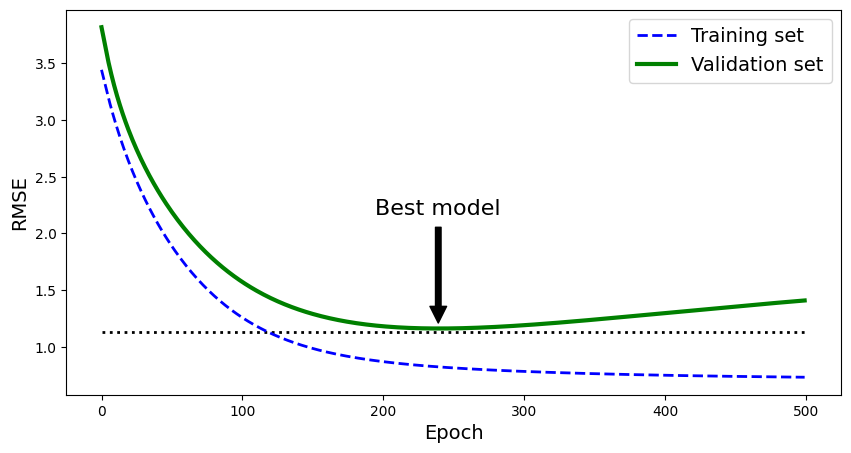

OK


In [25]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qc)  Early Stopping

Potentially we could implement early stopping to prevent overfitting. We will look at the model's performance on our validation set during training, and then stop when the performance starts to get worse (when we observe an increase in the validation error (`val_error`) compared to the `best_val_error`)

Below is some siple pseudo code that could implement early stopping.

```python
best_val_error = float("inf")
best_epoch = None

for epoch in range(n_epochs):  
    if val_error < best_val_error:
        best_val_error = val_error
        best_epoch = epoch
    
    if val_error > best_val_error:
        print("Stopping training: Validation error increased, training stopped.")
        break 
``` 

### Qd) Explain the Polynomial RMSE-Capacity plot

In the generated plot, the x-axis _Capacity_ represents the capacity / complexity, and the y-axis _RMSE_ / error of the model.

It is seen on the plot, that as we increase the capacity, both the training and validation RMS decreases at the beginning. This is due to the model becomming more and more complex as the capacity increases, and it's able to better fit the training data.

However, around a degree of 3, we see that the validation RMSE starts to increase, even though the training RMSE still falls. This is because the model is becomming too complex and starts overfitting the data (i.e. starts to capture noise). Increasing the capacity even further, we see on the plot that the overfitting increases. The training RMSE continues to fall, as it's getting good at fitting noise in the training data (it becomes too specific for the given training data).

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


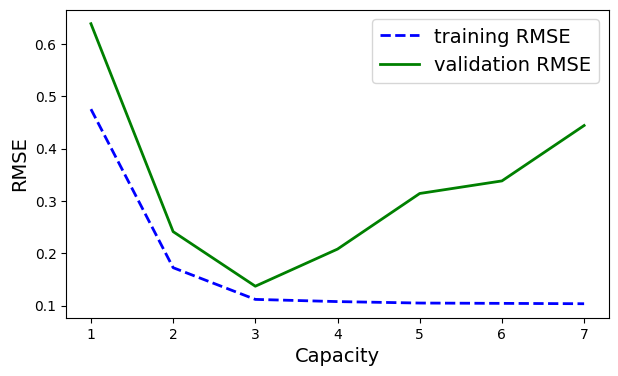

OK


In [26]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

When increasing the model capacity above 10, we notice on the below plot an exponentially growing overfitting. As explained in the `capacity_under_overfitting.ipynb` exercises, this is due to the model overfitting the training data and becomes bad at predicting new data. (The same happened in the Qa+b exercise when we set the degrees too high, shown in the first three plots) 

Iterating...degrees= range(1, 11)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61
  degree=  10, rmse_training=0.10, rmse_cv=38.94


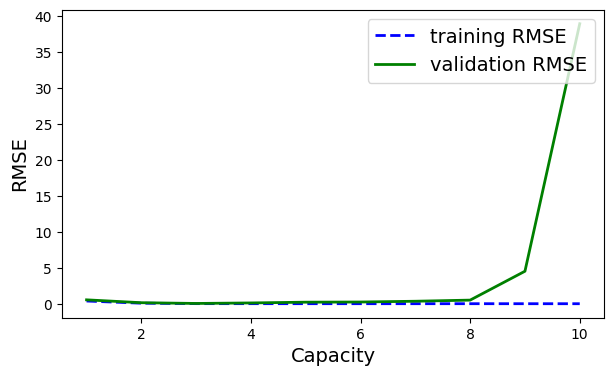

OK


In [27]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,11)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')